In [1]:
import numpy as np
from numpy.random import standard_t
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
NUM_SIMULATIONS = 10000

### **Simulating stock price movement using standard-T distribution**

In [3]:
def generate_stock_prices(S0, T, df):
  stock_prices = [S0]

  for _ in range(T):
    ds = standard_t(df)                             # Daily returns follow standard-T distribution
    stock_prices.append(stock_prices[-1] + ds)      # S(T + dT) = S(T) + dS

  return stock_prices

### **Plotting stock prices (Monte Carlo Simulation)**

In [4]:
S0 = int(input("input1: "))
K = int(input("input2: "))
T = int(input("input3: "))
df = int(input("input4: "))

input1: 100
input2: 100
input3: 30
input4: 15


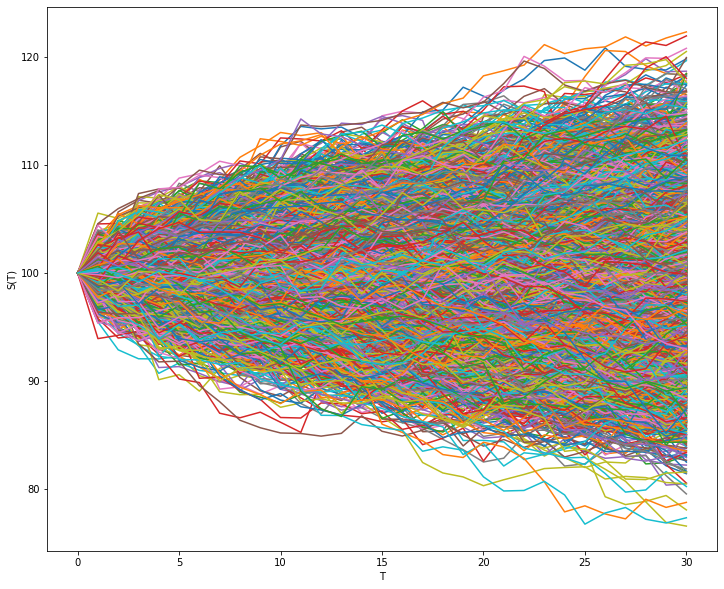

In [5]:
price_data = []

for _ in range(NUM_SIMULATIONS):
  price_data.append(generate_stock_prices(S0, T, df))       # Generating a time series of stock price for each simulation

price_data = pd.DataFrame(price_data)
price_data = price_data.T

plt.figure(figsize = (12, 10))
plt.plot(price_data)
plt.xlabel('T')
plt.ylabel('S(T)')
plt.show()

### **Generating payoffs for each simulation**

In [6]:
terminal_prices = price_data.T[T]         # List of terminal stock prices i.e stock prices at time T

payoffs = []

for price in terminal_prices:
	payoffs.append(max(0, price - K))       # For a call option: Payoff = Max(0, S[T] - K)
	

### **Generating the option value**

In [7]:
option_value = np.average(payoffs)        # We will average out the payoffs obtained from all the simulations
                                          # to determine the expected value of the option

print(option_value)                       # The value obtained is the future value of the option

2.3663614647218427
